In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

## Normal (Bell) Distribution

In [2]:
def show_bell(mean=0, std=3, size=1000, bins=30, show_pdf=True):
    sample = norm.rvs(loc=mean, scale=std, size=size)

    # histogram
    plt.hist(sample, bins=bins, density=True, alpha=0.6)

    if show_pdf:
        # theoretical normal curve
        x = np.linspace(mean - 4*std, mean + 4*std, 200)
        y = norm.pdf(x, mean, std)
        plt.plot(x, y)

    plt.show()

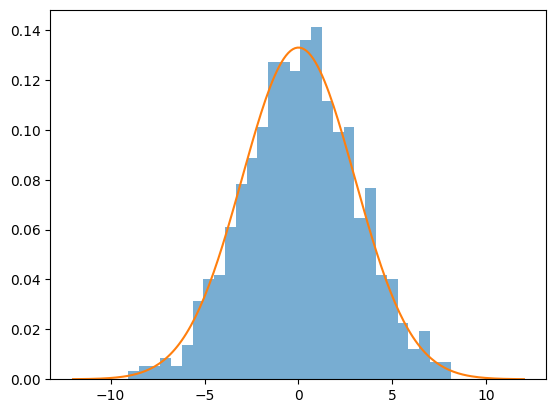

In [24]:
show_bell()

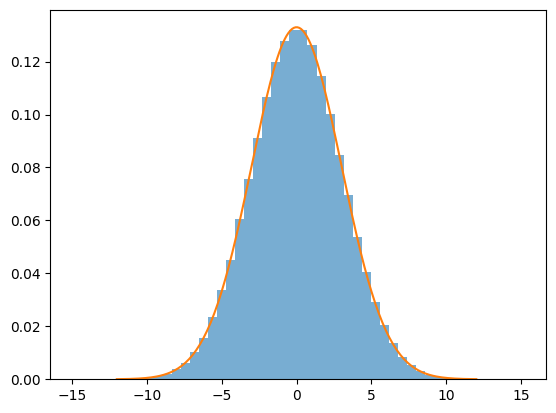

In [25]:
show_bell(size=1000000, bins=50)

# Central limit theorem

### Discrete uniform experiment

In [3]:
import random
import matplotlib.pyplot as plt

def test_central_limit_theorem_raw_python(experiment_count=1000, attempt_count=1000, outcome_count=2):
    """
    Simulates the Central Limit Theorem for a discrete uniform experiment.
    
    Parameters:
    - experiment_count: number of repeated experiments to simulate
    - attempt_count: number of random trials in each experiment
    - outcome_count: number of possible outcomes for each trial (e.g., 2 for a coin)
    
    The function plots a histogram of the proportion of a specific outcome (1) in each experiment.
    """
    flip_results = [] # List to store the proportion of "1" outcomes for each experiment

    for _ in range(experiment_count):
        # Simulate 'attempt_count' trials in this experiment
        # Each trial is a random integer from 1 to outcome_count
        flips = [random.randint(1,outcome_count) for _ in range(attempt_count)]

        # Count how many times '1' appeared, then divide by total trials to get proportion
        proportion = flips.count(1) / attempt_count

        # Store the proportion in the results list
        flip_results.append(proportion)

    # Plot a histogram of the proportions across all experiments
    # This shows how the mean of many trials distributes, demonstrating CLT
    plt.hist(flip_results, bins=20)
    plt.xlabel("Proportion of ones")
    plt.ylabel("Frequency")
    plt.title("Central Limit Theorem Simulation")
    plt.show()

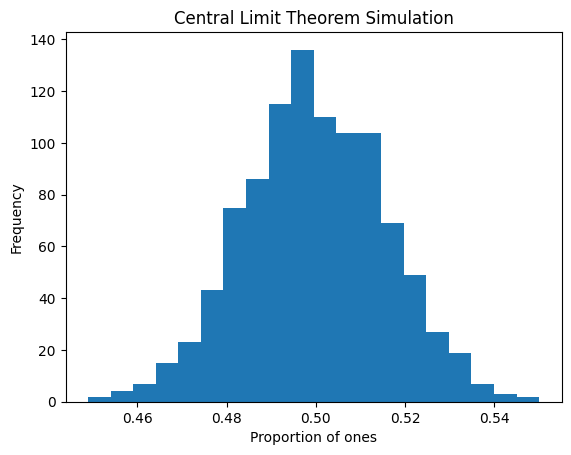

In [5]:
test_central_limit_theorem_raw_python()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def test_central_limit_theorem_numpy(experiment_count=1000, attempt_count=1000, outcome_count=2):
    """
    Simulates the Central Limit Theorem for a discrete uniform experiment using NumPy.
    
    Parameters:
    - experiment_count: number of repeated experiments to simulate
    - attempt_count: number of random trials in each experiment
    - outcome_count: number of possible outcomes for each trial (e.g., 2 for a coin, 6 for a dice)
    
    The function plots a histogram of the proportion of a specific outcome (1) in each experiment.
    """
    
    # Generate all random trials at once:
    # shape = (experiment_count, attempt_count)
    # Values are integers from 1 to outcome_count (inclusive)
    flips = np.random.randint(1, outcome_count + 1, size=(experiment_count, attempt_count))
    
    # Calculate the proportion of "1"s in each experiment
    # (flips == 1) creates a boolean array, mean(axis=1) gives proportion per row
    proportions = (flips == 1).mean(axis=1)
    
    # Plot histogram of the proportions
    plt.hist(proportions, bins=20)
    plt.xlabel("Proportion of ones")
    plt.ylabel("Frequency")
    plt.title("Central Limit Theorem Simulation (NumPy)")
    plt.show()


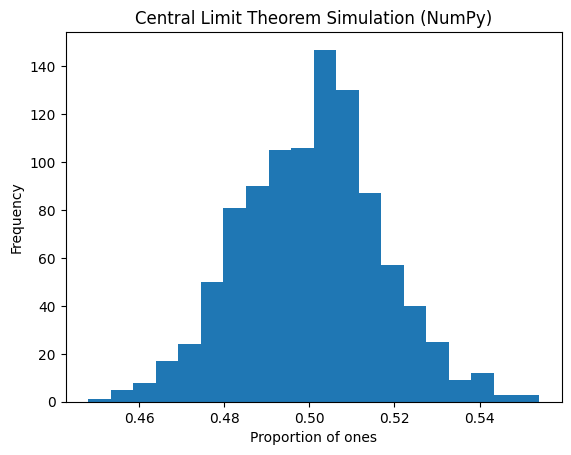

In [10]:
test_central_limit_theorem_numpy()

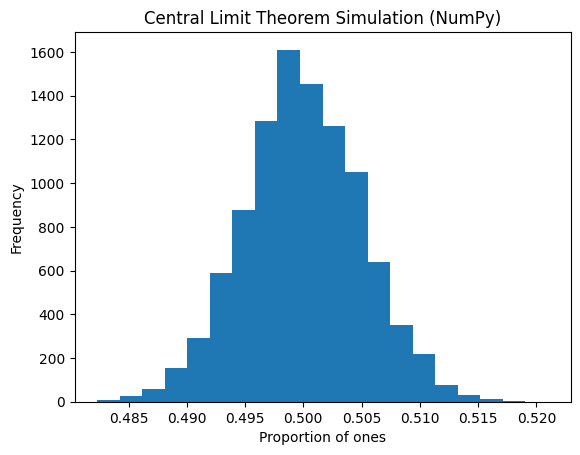

In [11]:
test_central_limit_theorem_numpy(experiment_count=10000, attempt_count=10000)

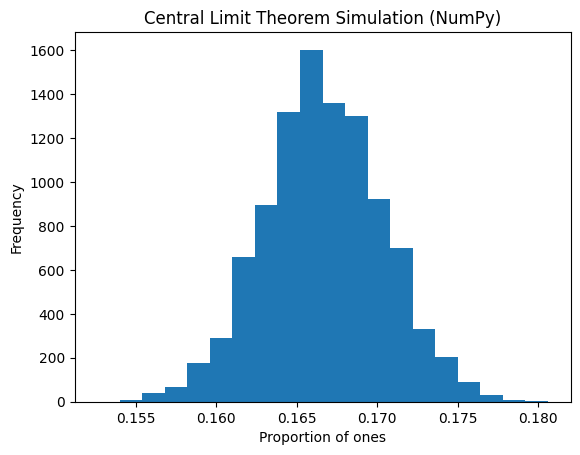

In [31]:
# Dice mode
test_central_limit_theorem_numpy(experiment_count=10000, attempt_count=10000, outcome_count=6)

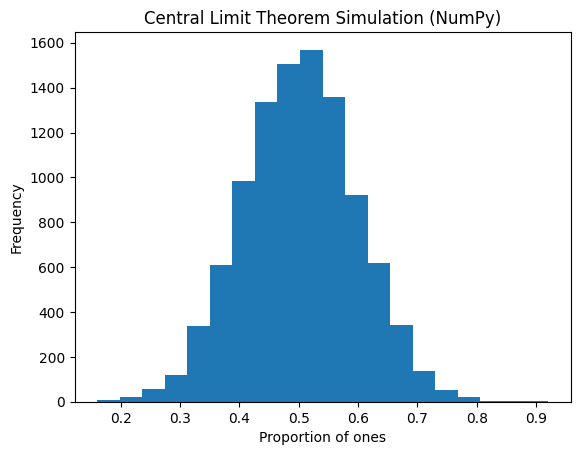

In [17]:
# low number of attempts per experiment mode
test_central_limit_theorem_numpy(experiment_count=10000, attempt_count=25, outcome_count=2)

### Sample mean distribution

In [18]:
medical_df = pd.read_csv('data/medical-charges.csv')

In [19]:
medical_df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [20]:
medical_df.shape

(1338, 7)

<Axes: >

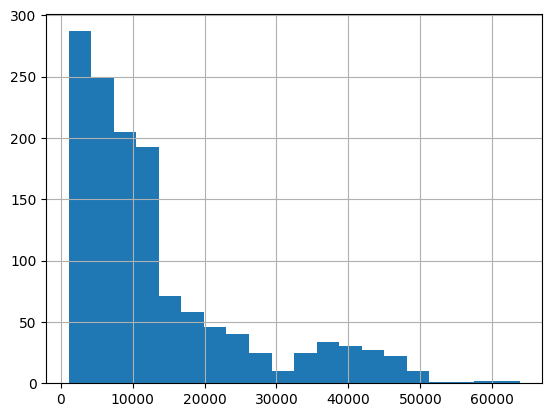

In [21]:
medical_df['charges'].hist(bins=20)

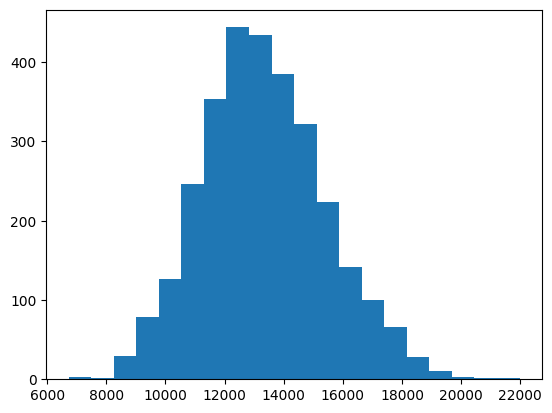

In [22]:
sample_means = []

for _ in range(3000):
    sample_means.append(medical_df['charges'].sample(33).mean())

plt.hist(sample_means, bins=20)
plt.show()

In [23]:
np.array(sample_means).mean()

np.float64(13330.69358238009)